In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, f1_score, precision_score, recall_score, roc_auc_score
import os

In [2]:
folder = "D:\Tinu Project\Projects Files Excel"
file = "heart(in).csv"

data = os.path.join(folder,file)
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

In [12]:
# Logistic Regression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_lg_proba = logreg.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred_logreg)
mse = mean_squared_error(y_test, y_pred_logreg)
r2 = r2_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_lg_proba)

print(" Logistic Regression :")
print(f'Accuracy: {accuracy:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'R-squared (R2): {r2:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'ROC-AUC score: {roc_auc:.3f}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_logreg)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_logreg)}\n')


 Logistic Regression :
Accuracy: 0.805
Mean Squared Error (MSE): 0.195
R-squared (R2): 0.220
F1-score: 0.811
Precision: 0.763
Recall: 0.866
ROC-AUC score: 0.897
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308

Confusion Matrix:
[[119  40]
 [ 20 129]]



In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

print(f'Accuracy: {accuracy:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'R-squared (R2): {r2:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'ROC-AUC score: {roc_auc:.3f}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_knn)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}\n')


Accuracy: 0.857
Mean Squared Error (MSE): 0.143
R-squared (R2): 0.428
F1-score: 0.854
Precision: 0.843
Recall: 0.866
ROC-AUC score: 0.953
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       159
           1       0.84      0.87      0.85       149

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308

Confusion Matrix:
[[135  24]
 [ 20 129]]



In [14]:
# Support Vector Machine (SVM) Model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svc)
mse = mean_squared_error(y_test, y_pred_svc)
r2 = r2_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)

print(f'Accuracy: {accuracy:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'R-squared (R2): {r2:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')

print(f'Classification Report:\n{classification_report(y_test, y_pred_svc)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}\n')

Accuracy: 0.808
Mean Squared Error (MSE): 0.192
R-squared (R2): 0.233
F1-score: 0.815
Precision: 0.765
Recall: 0.872
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.82       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308

Confusion Matrix:
[[119  40]
 [ 19 130]]



In [16]:
# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9707792207792207
[[159   0]
 [  9 140]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [10]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'R-squared (R2): {r2:.3f}')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9805194805194806
Mean Squared Error (MSE): 0.019
R-squared (R2): 0.922
[[159   0]
 [  6 143]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



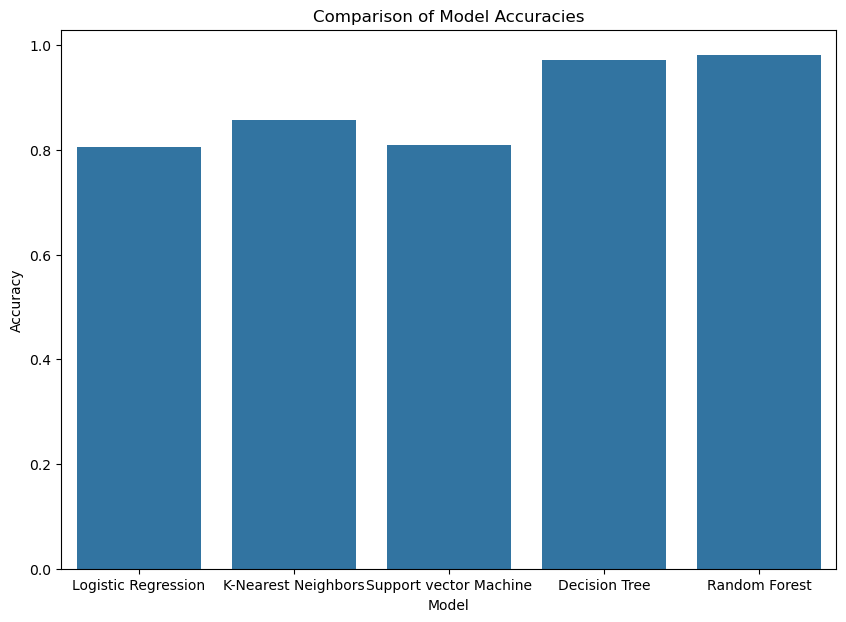

In [17]:
models = ['Logistic Regression','K-Nearest Neighbors', 'Support vector Machine', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_logreg),
              accuracy_score(y_test, y_pred_knn),
              accuracy_score(y_test, y_pred_svc),
              accuracy_score(y_test, y_pred_tree),
              accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(10,7))
sns.barplot(x=models, y= accuracies)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

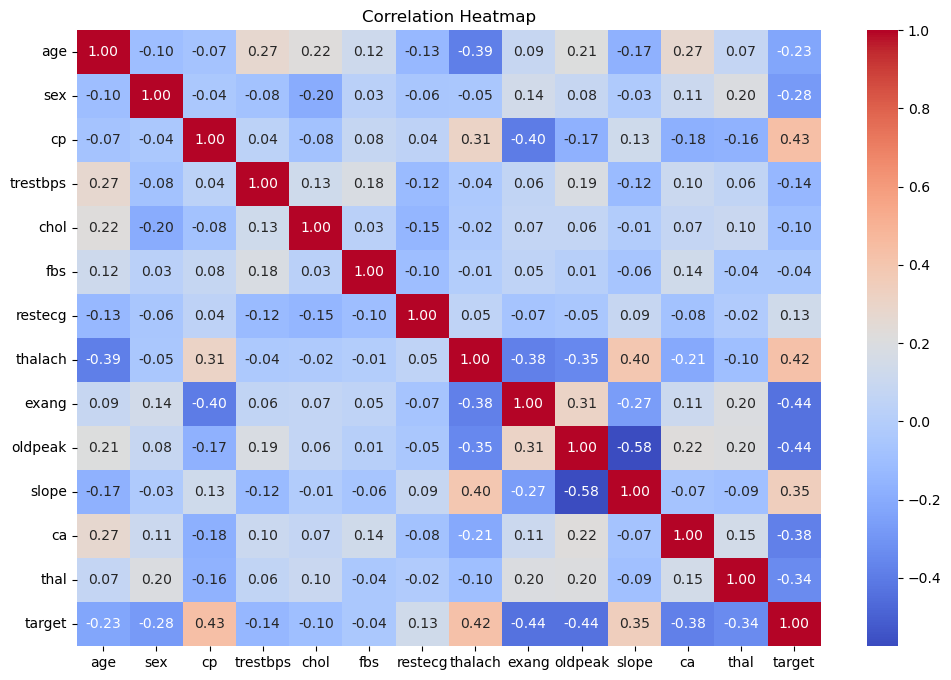

In [18]:
# Data Visualization 

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

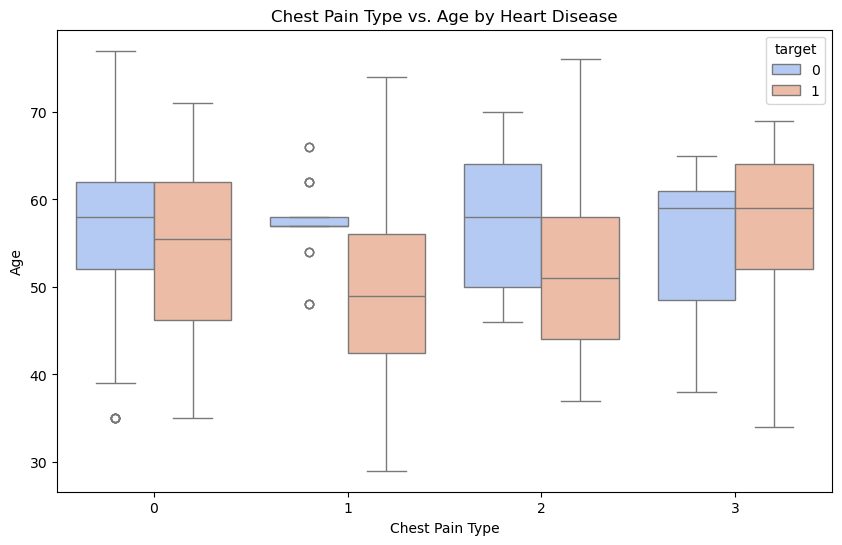

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='age', hue='target', data=df, palette='coolwarm')
plt.title('Chest Pain Type vs. Age by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()

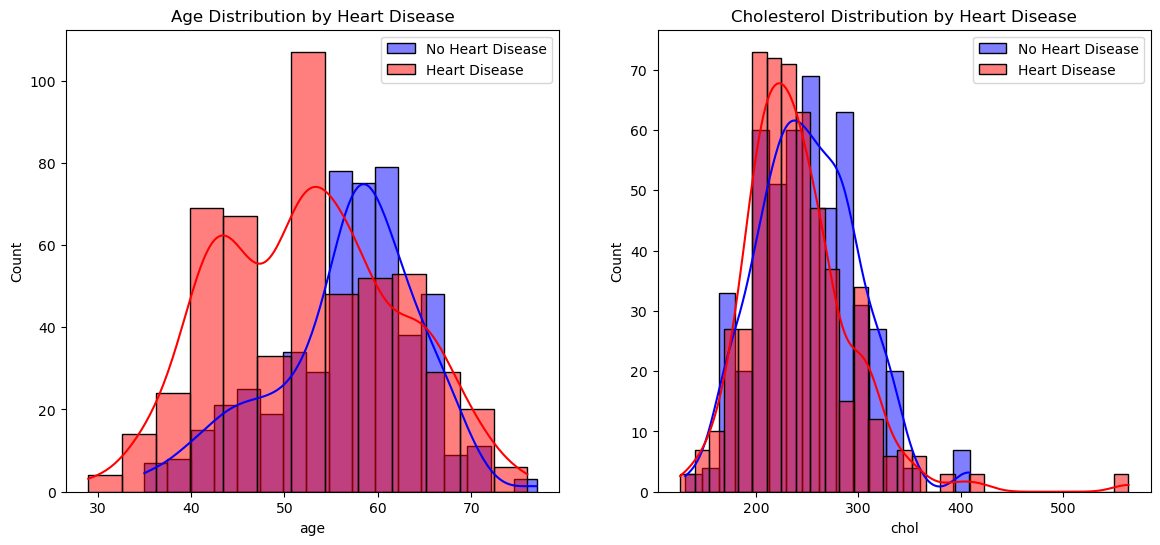

In [20]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['target'] == 0]['age'], kde=True, color='blue', label='No Heart Disease')
sns.histplot(df[df['target'] == 1]['age'], kde=True, color='red', label='Heart Disease')
plt.title('Age Distribution by Heart Disease')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df[df['target'] == 0]['chol'], kde=True, color='blue', label='No Heart Disease')
sns.histplot(df[df['target'] == 1]['chol'], kde=True, color='red', label='Heart Disease')
plt.title('Cholesterol Distribution by Heart Disease')
plt.legend()

plt.show()

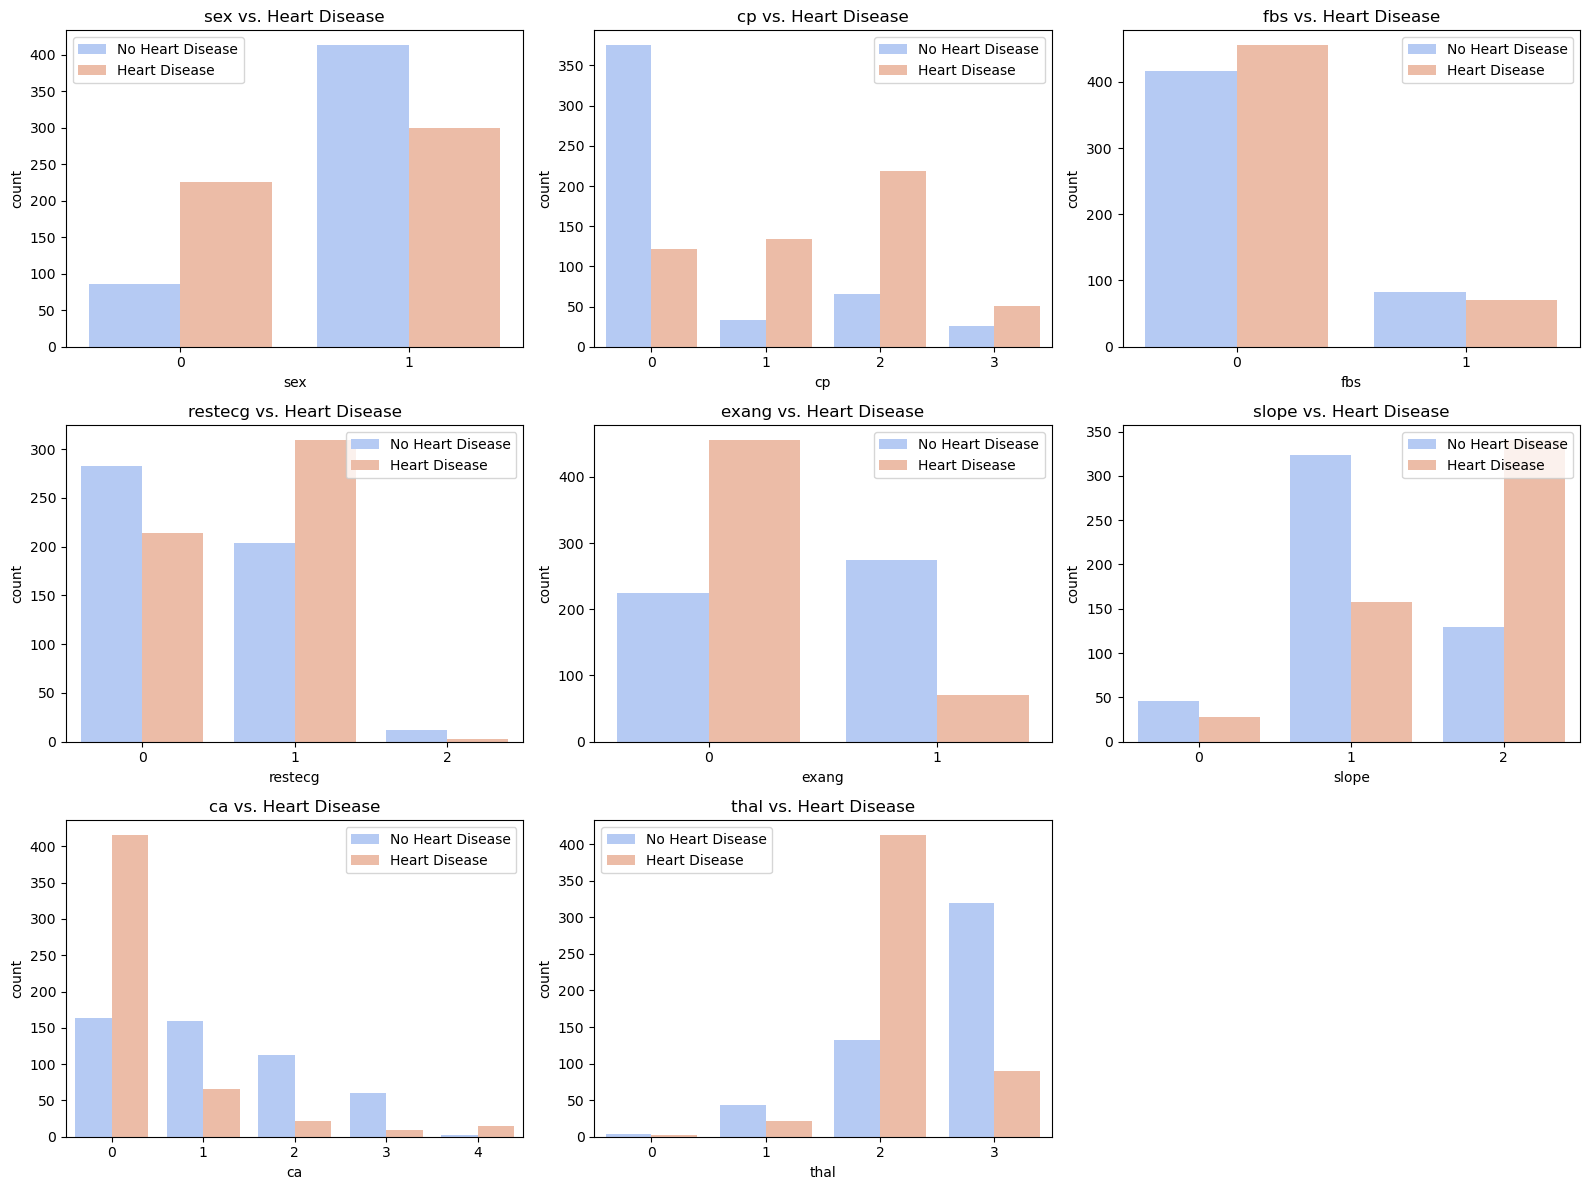

In [24]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='target', data=df, palette='coolwarm')
    plt.title(f'{feature} vs. Heart Disease')
    plt.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_14740\1510647269.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='coolwarm')


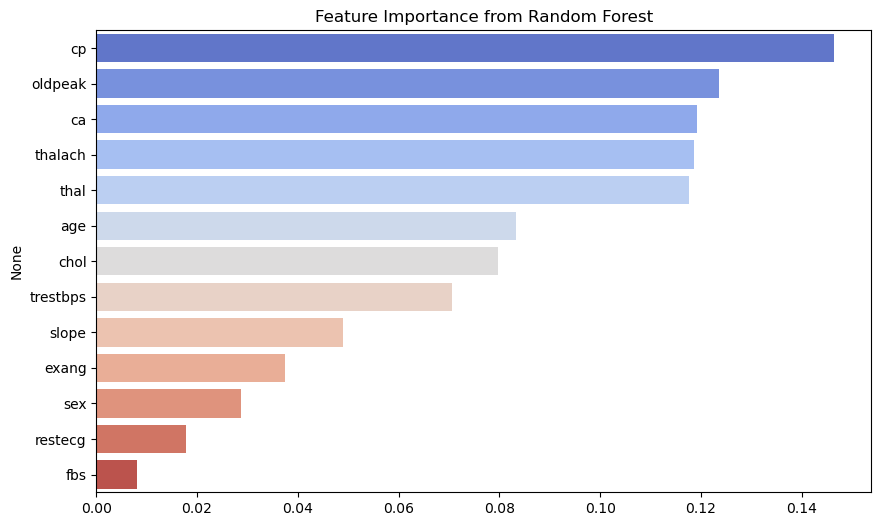

In [25]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.columns[:-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='coolwarm')
plt.title('Feature Importance from Random Forest')
plt.show()

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

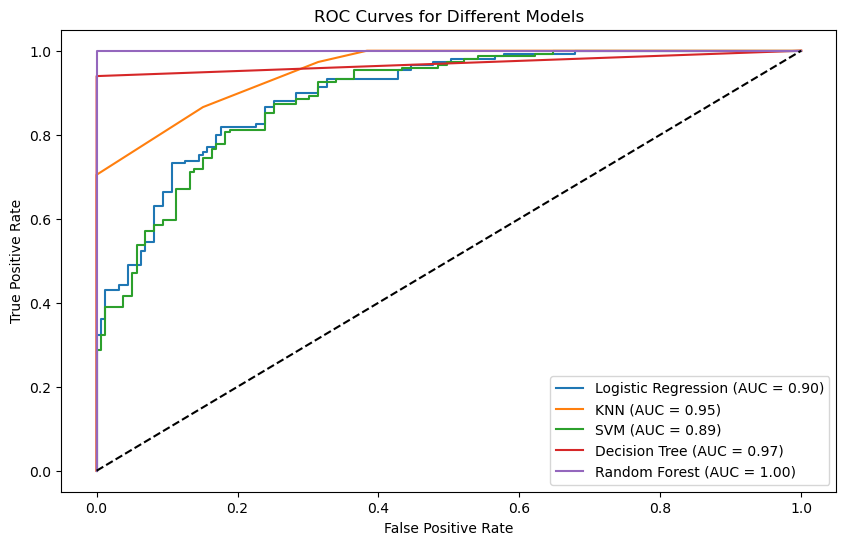

In [33]:
plt.figure(figsize=(10, 6))

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])))

# SVM
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr_svc, tpr_svc, label='SVM (AUC = {:.2f})'.format(roc_auc_score(y_test, svc.decision_function(X_test))))

# Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])))

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
